In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import analysis.model_assessment

In [2]:
data = np.load('../train_set.npz')
refls = data['output_rfl']
wv = data['output_wv']
fids = data['output_idx']

values, counts = np.unique(fids, return_counts=True)
scenes = np.split(refls, 946)
wv_by_scene = np.split(wv, 946)
scenes = np.array(scenes)
wv_by_scene = np.array(wv_by_scene)

print('clouds unfiltered: ', scenes.shape)
print('clouds unfiltered: ', wv_by_scene.shape)

bad = []
for i in range(wv_by_scene.shape[0]):
    scene = wv_by_scene[i].copy()
    if scene[np.where((scene > 6) | (scene < 0))].shape[0] != 0:
        bad.append(i)

wv_by_scene = np.delete(wv_by_scene, bad, axis = 0)
scenes = np.delete(scenes, bad, axis = 0)
print('clouds filtered: ', scenes.shape)
print('clouds filtered: ', wv_by_scene.shape)

clouds unfiltered:  (946, 1242, 285)
clouds unfiltered:  (946, 1242)
clouds filtered:  (756, 1242, 285)
clouds filtered:  (756, 1242)


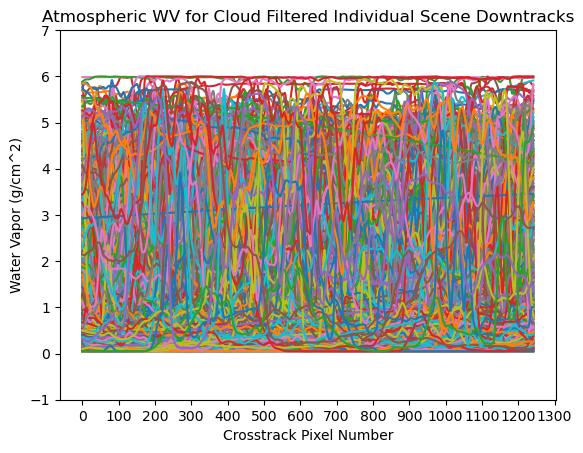

In [5]:
for i in range(wv_by_scene.shape[0]):
    plt.plot(wv_by_scene[i])
    plt.yticks(range(-1, 8))
    plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300])
    plt.ylabel('Water Vapor (g/cm^2)')
    plt.xlabel('Crosstrack Pixel Number')
    plt.title('Atmospheric WV for Cloud Filtered Individual Scene Downtracks');

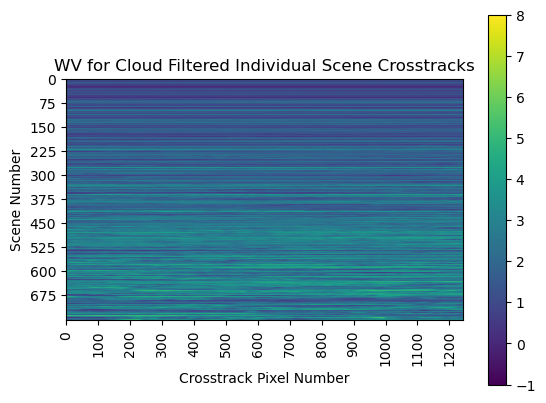

In [6]:
plt.imshow(wv_by_scene, vmin = -1, vmax = 8)
plt.colorbar()
yticks = range(0, 750, 75)
plt.yticks(yticks)
plt.xticks(range(0, 1300, 100), rotation = 'vertical')
plt.xlabel('Crosstrack Pixel Number')
plt.ylabel('Scene Number')
plt.title('WV for Cloud Filtered Individual Scene Crosstracks');

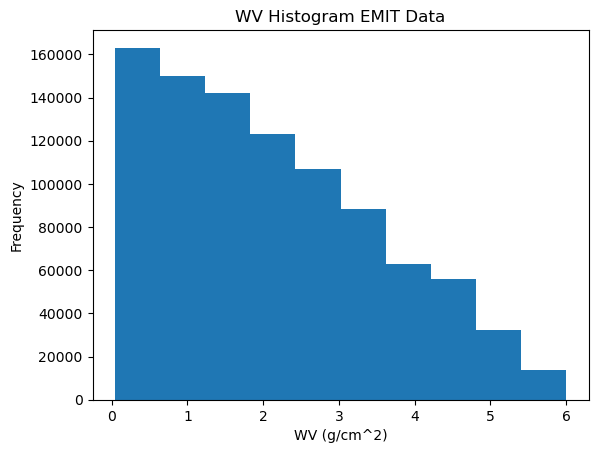

In [8]:
plt.hist(wv_by_scene.flatten())
plt.xlabel('WV (g/cm^2)')
plt.ylabel('Frequency')
plt.title('WV Histogram EMIT Data')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_idx = np.random.choice(wv_by_scene.shape[0], 100)
y_idx = X_idx
X_train_idx, X_test_idx, y_train_idx, y_test_idx = train_test_split(X_idx, y_idx, test_size = 0.2, random_state = 50)

X_train = scenes[X_train_idx, :, :]
X_train = X_train.reshape((X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
X_test = scenes[X_test_idx, :, :]
X_test = X_test.reshape((X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
y_train = wv_by_scene[y_train_idx, :]
y_train = y_train.flatten()
y_test = wv_by_scene[y_test_idx, :]
y_test = y_test.flatten()


print('X train: ', X_train.shape)
print('y train: ', y_train.shape)
print('X test: ', X_test.shape)
print('y test : ', y_test.shape)
print('X train index: ', X_train_idx) 
print('y train index: ', y_train_idx) 
print('X test index: ', X_test_idx) 
print('y test index: ', y_test_idx) 

X train:  (99360, 285)
y train:  (99360,)
X test:  (24840, 285)
y test :  (24840,)
X train index:  [504 105  91 337 156 372 491 458 339 455 379 701 729  13 748 566 560 385
 475 427 466 435 130 401 241 270  52  14 681 345  87 484 459 191 313 205
 614 724 454  40 555 476 508  21 102 387 214 702 561  80 366 726 251 252
 719 308 461  34 562 166 747 243 343  20 160 510 161 387 565 270 700 413
 216 389  71 187 474 330 492  20]
y train index:  [504 105  91 337 156 372 491 458 339 455 379 701 729  13 748 566 560 385
 475 427 466 435 130 401 241 270  52  14 681 345  87 484 459 191 313 205
 614 724 454  40 555 476 508  21 102 387 214 702 561  80 366 726 251 252
 719 308 461  34 562 166 747 243 343  20 160 510 161 387 565 270 700 413
 216 389  71 187 474 330 492  20]
X test index:  [269 201 276  99 189 686 315 130 564 273 661   1 295 663 646 106 699 600
 121  58]
y test index:  [269 201 276  99 189 686 315 130 564 273 661   1 295 663 646 106 699 600
 121  58]


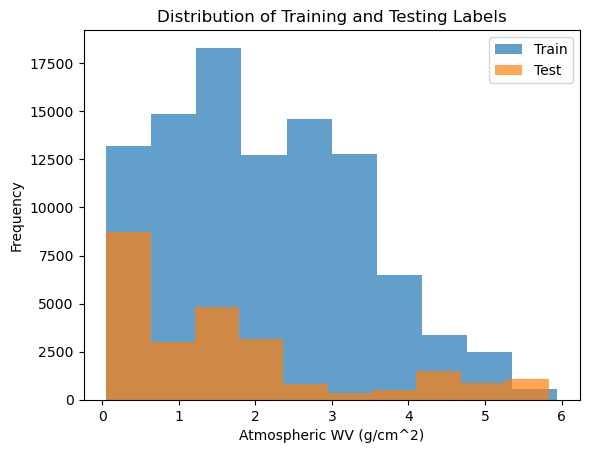

In [11]:
analysis.model_assessment.plot_hist(y_train, y_test, 'Distribution of Training and Testing Labels', 'Train', 'Test')